In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
delivery=pd.read_csv("C:\\Users\\Admin\\Documents\\Assignments\\Linear regression\\delivery_time.csv")

In [3]:
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [5]:
import statsmodels.formula.api as smf
import seaborn as sns

In [6]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
delivery.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


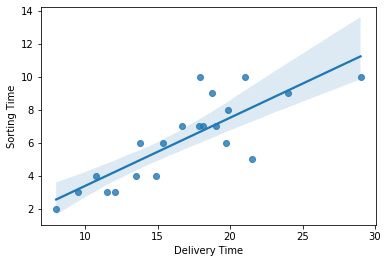

In [9]:
sns.regplot('Delivery Time', 'Sorting Time', data=delivery)
plt.show()

In [11]:

delivery.rename(columns = {'Delivery Time':'Delivery', 'Sorting Time':'Sorting'}, inplace = True)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

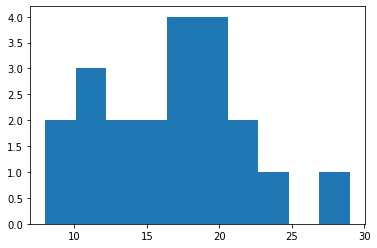

In [12]:
plt.hist(delivery.Delivery)

In [13]:
delivery

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [14]:
delivery.columns = ['Delivery', 'Sorting']
model = smf.ols(formula='Delivery ~ Sorting', data=delivery).fit()

In [15]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        21:28:27   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.0

In [17]:
model.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
Sorting,1.108673,2.189367


In [18]:
pred_1 = model.predict(delivery.iloc[:,1])

In [19]:
pred_1.corr(delivery.Sorting)

0.9999999999999997

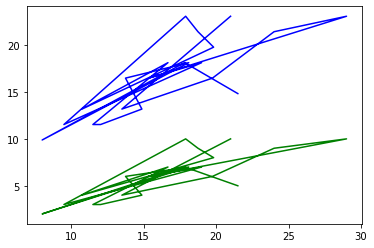

In [20]:
plt.plot(delivery['Delivery'],delivery['Sorting'],color='green');plt.plot(delivery['Delivery'],pred_1,color='blue')

*********Transformations************
1. Exponential Transformation

In [21]:
model1=smf.ols(formula= 'Delivery ~ np.log(Sorting)',data=delivery).fit()

In [22]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           2.64e-06
Time:                        21:28:31   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1597      2.455     

In [23]:
model1.params

Intercept          1.159684
np.log(Sorting)    9.043413
dtype: float64

In [24]:
model1.conf_int(0.01)

,0,1
Intercept,-5.862666,8.182033
np.log(Sorting),5.115458,12.971369


In [25]:
pred_log = model1.predict(delivery.iloc[:,1])

In [26]:
pred_log.corr(delivery.Sorting)

0.9774469985241836

In [27]:
pred_log

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

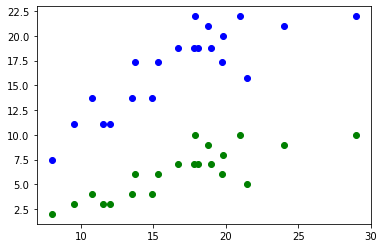

In [29]:
plt.scatter(x=delivery['Delivery'],y=delivery['Sorting'],color='green');plt.scatter(x=delivery['Delivery'],y=pred_log,color='blue')


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


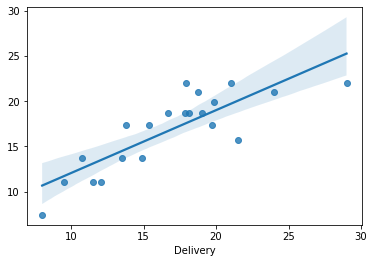

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


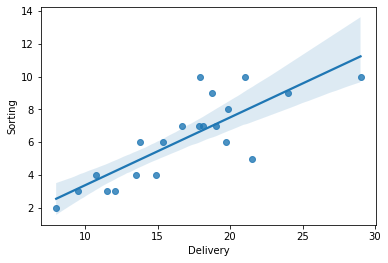

In [35]:
sns.regplot('Delivery', pred_log, data=delivery)
plt.show()
sns.regplot('Delivery', 'Sorting', data=delivery)
plt.show()

In [36]:
residual_log=pred_log-delivery.Sorting

<AxesSubplot:ylabel='Density'>

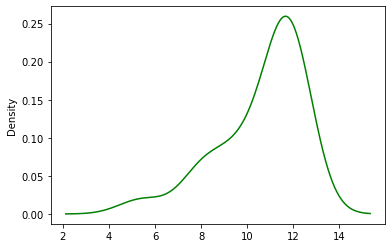

In [38]:
residual_log.plot.density(color='green')

2. Squared Transformation

In [41]:
Sorting_sq=delivery.Sorting*delivery.Sorting
model2=smf.ols(formula= 'Delivery ~ Sorting+Sorting_sq',data=delivery).fit()

In [42]:
model2.params

Intercept     3.522234
Sorting       2.813002
Sorting_sq   -0.093198
dtype: float64

In [43]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           2.39e-05
Time:                        22:02:25   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5222      4.160      0.847      0.408      -5.217      12.261
Sorting        2.8130      1.461      1.926      0.070      -0.256       5.882
Sorting_sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
pred_quad=model2.predict((delivery.iloc[:,1]))

In [45]:
pred_quad

0     22.332430
1     13.283069
2     17.045108
3     21.290194
4     22.332430
5     17.045108
6     18.646533
7     11.122455
8     22.332430
9     21.290194
10    20.061562
11    13.283069
12    18.646533
13    11.122455
14    11.122455
15    13.283069
16    17.045108
17    18.646533
18     8.775444
19    18.646533
20    15.257287
dtype: float64

In [46]:
pred_quad.corr(delivery.Sorting)

0.991914591428056